In [123]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/krhf-dmet/diamond \
     --filename=out.log --output=../data/diamond-krhf-dmet.json

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import json

from pathlib import Path

figpath = Path("/Users/yangjunjie/Desktop/fftisdf-embedding/fig/")
assert figpath.exists()

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

data = None
with open('../data/diamond-krhf-dmet.json', 'r') as f:
    data = json.load(f)

kcalmol_to_hartree = 1 / 627.5
color = {'FFTISDF': 'b', 'GDF': 'r', 'RSDF': 'r', 'FFTDF': 'g'}

for k, v in data.items():
    for kk, vv in v.items():
        print(kk, vv)
    break

method fftisdf-80-10
basis cc-pvdz
natm 2.0
nkpt 48.0
nao 26.0
time_build_df 22.56
df_size_in_gb 0.0532
naux 260.0
time_krhf 3.65
ene_krhf -11.03044374
time_get_j 0.2
time_get_k 0.16
time_get_eri 0.48
time_dmet 24.74
ene_dmet -11.21610653


   fftisdf-60-14: a = 0.8725, b = -2.8427
         gdf-2.0: a = 1.7960, b = -6.7509
   fftisdf-60-14: a = 0.9996, b = -9.8817
         gdf-2.0: a = 1.9989, b = -11.1440


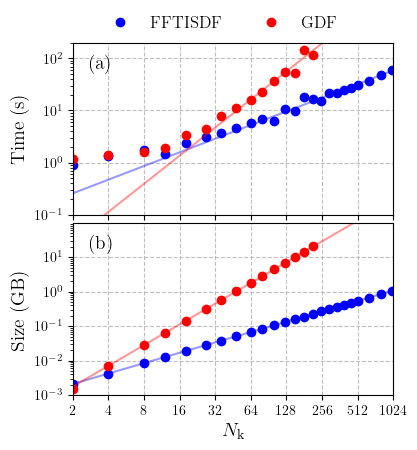

In [135]:
def get_xy_from_keyword(method, keyword):
    d = {}
    for k, v in data.items():
        x = v.get("nkpt")
        y = v.get(keyword)
        natm = v.get("natm")

        m = v.get("method")
        if not m == method:
            continue

        if x is not None and y is not None and natm is not None:
            d[x] = y / natm

    return d

fig, ax = plt.subplots(2, 1, figsize=(4, 4), sharex=True, sharey=False)
fontsize = 14

# k0 = "fftdf-100"
# k1 = "fftdf-60"
# k2 = "fftisdf-60-10"
# k3 = "fftisdf-60-14"
# k4 = "gdf-2.0"
kk = ["fftdf-100", "fftdf-60", "fftisdf-60-10", "fftisdf-60-14", "gdf-2.0"]

d0 = get_xy_from_keyword(kk[2], "time_build_df")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

dd = [get_xy_from_keyword(k, "time_build_df") for k in kk]
yy = [np.array([d.get(x, np.nan) for x in xx]) for d in dd]

ix = 3
assert kk[ix] == "fftisdf-60-14"
ax[0].semilogy(np.log2(xx), yy[ix] / 2, label=r"FFTISDF", color=color["FFTISDF"], marker="o", linestyle="")
a, b = np.polyfit(np.log2(xx[10:]), np.log2(yy[ix][10:] / 2), 1)
ax[0].semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTISDF"], linestyle="-", alpha=0.4)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 4
assert kk[ix] == "gdf-2.0"
ax[0].semilogy(np.log2(xx), yy[ix], label=r"GDF", color=color["GDF"], marker="o", linestyle="")
a, b = np.polyfit(np.log2(xx[7:14]), np.log2(yy[ix][7:14]), 1)
ax[0].semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["GDF"], linestyle="-", alpha=0.4)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

xx = range(1, 11)
ax[0].set_xlim(xx[0], xx[-1])
ax[0].set_xticks(xx)
ax[0].set_xticklabels([2**x for x in xx])
ax[0].set_ylim(1e-1, 200)
ax[0].set_ylabel("Time (s)", fontsize=fontsize)

ax[0].grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)

kk = ["fftdf-100", "fftdf-60", "fftisdf-60-10", "fftisdf-60-14", "gdf-2.0"]
d0 = get_xy_from_keyword(kk[2], "df_size_in_gb")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

dd = [get_xy_from_keyword(k, "df_size_in_gb") for k in kk]
yy = [np.array([d.get(x, np.nan) for x in xx]) for d in dd]

ix = 3
assert kk[ix] == "fftisdf-60-14"
ax[1].semilogy(np.log2(xx), yy[ix], color=color["FFTISDF"], marker="o", linestyle="")
a, b = np.polyfit(np.log2(xx[10:]), np.log2(yy[ix][10:]), 1)
ax[1].semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTISDF"], linestyle="-", alpha=0.4)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 4
assert kk[ix] == "gdf-2.0"
ax[1].semilogy(np.log2(xx), yy[ix], color=color["GDF"], marker="o", linestyle="")
a, b = np.polyfit(np.log2(xx[7:14]), np.log2(yy[ix][7:14]), 1)
ax[1].semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["GDF"], linestyle="-", alpha=0.4)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))
ax[1].set_ylim(1e-3, 95)

ax[1].set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
ax[1].grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)
ax[1].set_ylabel("Size (GB)", fontsize=fontsize)

ax[0].text(
    0.05, 0.85,
    "(a)",
    fontsize=fontsize,
    transform=ax[0].transAxes,
    ha="left",
)

ax[1].text(
    0.05, 0.85,
    "(b)",
    fontsize=fontsize,
    transform=ax[1].transAxes,
    ha="left",
)

fig.legend(
    fontsize=fontsize - 2,
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0.2, 1.10),
    ncol=4,
)

fig.tight_layout(
    pad=0.1,
)

fig.savefig(figpath / "diamond-time-and-size.pdf", bbox_inches="tight", dpi=300)

   fftisdf-60-14: a = 0.9490, b = -7.9604
         gdf-2.0: a = 2.0065, b = -7.0249
        fftdf-80: a = 1.9883, b = -5.3758
   fftisdf-60-14: a = 0.8905, b = -6.5516
         gdf-2.0: a = 2.0537, b = -7.1879
        fftdf-80: a = 1.9986, b = -2.2487


Text(0, 0.5, 'Time (s)')

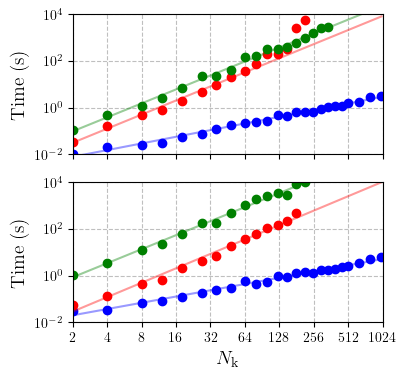

In [ ]:
def get_xy_from_keyword(method, keyword):
    d = {}
    for k, v in data.items():
        x = v.get("nkpt")
        y = v.get(keyword)
        natm = v.get("natm")

        m = v.get("method")
        if not m == method:
            continue

        if x is not None and y is not None and natm is not None:
            d[x] = y / natm

    return d

fig, ax = plt.subplots(2, 1, figsize=(4, 4), sharex=True, sharey=False)
fontsize = 14

# k0 = "fftdf-100"
# k1 = "fftdf-60"
# k2 = "fftisdf-60-10"
# k3 = "fftisdf-60-14"
# k4 = "gdf-2.0"
kk = ["fftdf-80", "fftdf-60", "fftisdf-60-10", "fftisdf-60-14", "gdf-2.0"]

d0 = get_xy_from_keyword(kk[2], "time_get_k")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

dd = [get_xy_from_keyword(k, "time_get_k") for k in kk]
yy = [np.array([d.get(x, np.nan) for x in xx]) for d in dd]

ix = 3
assert kk[ix] == "fftisdf-60-14"
ax[0].semilogy(np.log2(xx), yy[ix], label=r"FFTISDF", color=color["FFTISDF"], marker="o", linestyle="")
a, b = np.polyfit(np.log2(xx), np.log2(yy[ix]), 1)
ax[0].semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTISDF"], linestyle="-", alpha=0.4)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 4
assert kk[ix] == "gdf-2.0"
ax[0].semilogy(np.log2(xx), yy[ix], label=r"GDF", color=color["GDF"], marker="o", linestyle="")
a, b = np.polyfit(np.log2(xx[0:10]), np.log2(yy[ix][0:10]), 1)
ax[0].semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["GDF"], linestyle="-", alpha=0.4)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 0
assert kk[ix] == "fftdf-80"
ax[0].semilogy(np.log2(xx), yy[ix], label=r"FFTDF", color=color["FFTDF"], marker="o", linestyle="")
a, b = np.polyfit(np.log2(xx[0:10]), np.log2(yy[ix][0:10]), 1)
ax[0].semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTDF"], linestyle="-", alpha=0.4)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

xx = range(1, 11)
ax[0].set_xlim(xx[0], xx[-1])
ax[0].set_xticks(xx)
ax[0].set_xticklabels([2**x for x in xx])
ax[0].set_ylim(2e-2, 1e4)
ax[0].set_ylabel("Time (s)", fontsize=fontsize)

ax[0].grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)

kk = ["fftdf-80", "fftdf-60", "fftisdf-60-10", "fftisdf-60-14", "gdf-2.0"]
d0 = get_xy_from_keyword(kk[2], "time_get_eri")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

dd = [get_xy_from_keyword(k, "time_get_eri") for k in kk]
yy = [np.array([d.get(x, np.nan) for x in xx]) for d in dd]

ix = 3
assert kk[ix] == "fftisdf-60-14"
ax[1].semilogy(np.log2(xx), yy[ix], color=color["FFTISDF"], marker="o", linestyle="")
a, b = np.polyfit(np.log2(xx), np.log2(yy[ix]), 1)
ax[1].semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTISDF"], linestyle="-", alpha=0.4)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 4
assert kk[ix] == "gdf-2.0"
ax[1].semilogy(np.log2(xx), yy[ix], color=color["GDF"], marker="o", linestyle="")
a, b = np.polyfit(np.log2(xx[0:14]), np.log2(yy[ix][0:14]), 1)
ax[1].semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["GDF"], linestyle="-", alpha=0.4)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 0
assert kk[ix] == "fftdf-80"
ax[1].semilogy(np.log2(xx), yy[ix], color=color["FFTDF"], marker="o", linestyle="")
a, b = np.polyfit(np.log2(xx[0:10]), np.log2(yy[ix][0:10]), 1)
ax[1].semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTDF"], linestyle="-", alpha=0.4)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ax[1].set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
ax[1].grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)
ax[1].set_ylim(1e-2, 1e4)
ax[1].set_ylabel("Time (s)", fontsize=fontsize)

# ax[0].text(
#     0.05, 0.85,
#     "(a)",
#     fontsize=fontsize,
#     transform=ax[0].transAxes,
#     ha="left",
# )

# ax[1].text(
#     0.05, 0.85,
#     "(b)",
#     fontsize=fontsize,
#     transform=ax[1].transAxes,
#     ha="left",
# )

# fig.legend(
#     fontsize=fontsize - 2,
#     frameon=False,
#     loc="upper left",
#     bbox_to_anchor=(0.2, 1.10),
#     ncol=4,
# )

# fig.tight_layout(
#     pad=0.1,
# )

# fig.savefig(figpath / "diamond-time-and-size.pdf", bbox_inches="tight", dpi=300)